# ABS Monthly Labour Force 6202

## Python set-up

In [1]:
# system imports
import sys

# analytic imports
import pandas as pd
import matplotlib.pyplot as plt

# local imports
from abs_data_capture import (
    get_fs_constants,
    get_plot_constants,
    get_meta_constants,
    get_ABS_meta_and_data,
    get_identifier,
    clear_cache,
    plot_rows_seas_trend,
    plot_rows_individually,
    plot_rows_collectively,
)
from plotting import (
    set_chart_dir,
    clear_chart_dir,
    plot_covid_recovery,
    line_plot,
    calc_and_plot_growth,
)

# pandas display settings
pd.options.display.max_rows = None
pd.options.display.max_columns = 999

# display all charts in this notebook ...
SHOW = True

## Get data from ABS

In [2]:
catalogue_id = "6202"
source, CHART_DIR, META_DATA = get_fs_constants(catalogue_id)
abs_dict = get_ABS_meta_and_data(catalogue_id, verbose=False)
if abs_dict is None:
    sys.exit(-1)

meta = abs_dict[META_DATA]
RECENT, plot_times, plot_tags = get_plot_constants(meta)
did_col, id_col, table_col, type_col, unit_col = get_meta_constants()

Found URL for a ZIP file on ABS web page
We need to download this file from the ABS ...
Saving ABS download to cache.
Extracting DataFrames from the zip-file ...


## Plot

### Set-up some constants we will use across all plots

In [3]:
clear_chart_dir(CHART_DIR)
set_chart_dir(CHART_DIR)
plt.style.use("fivethirtyeight")

### Headline seasonally adjusted/trend charts

Note: with COVID, the ABS has stopped publishing the Trend series.  

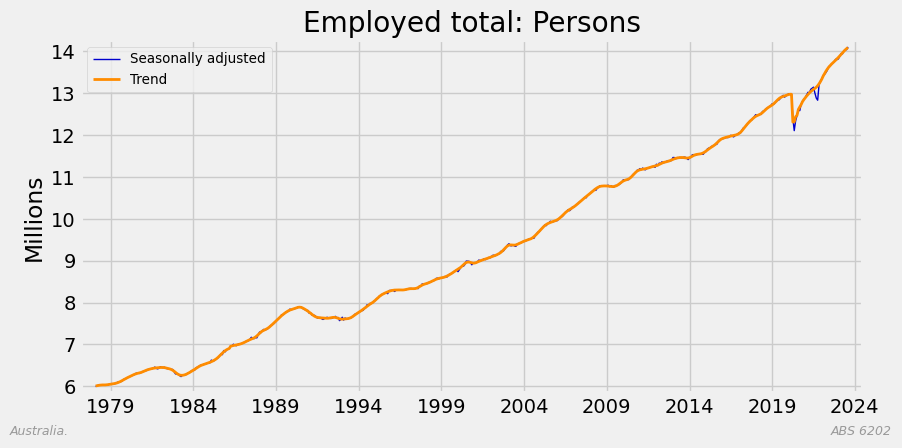

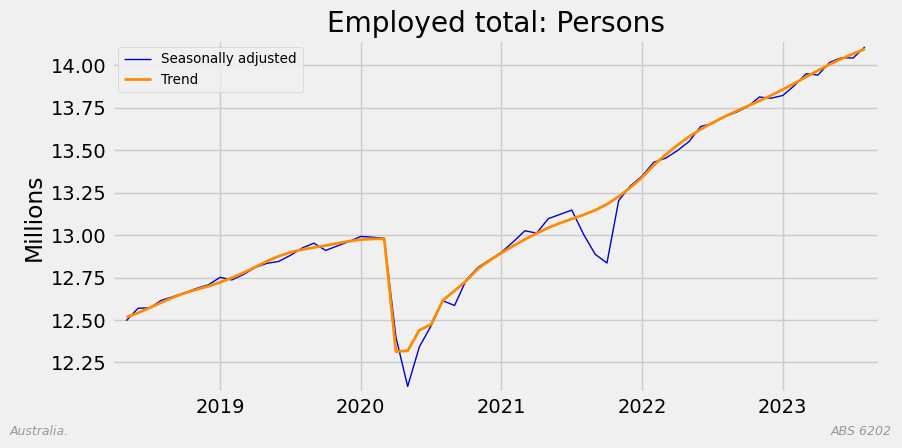

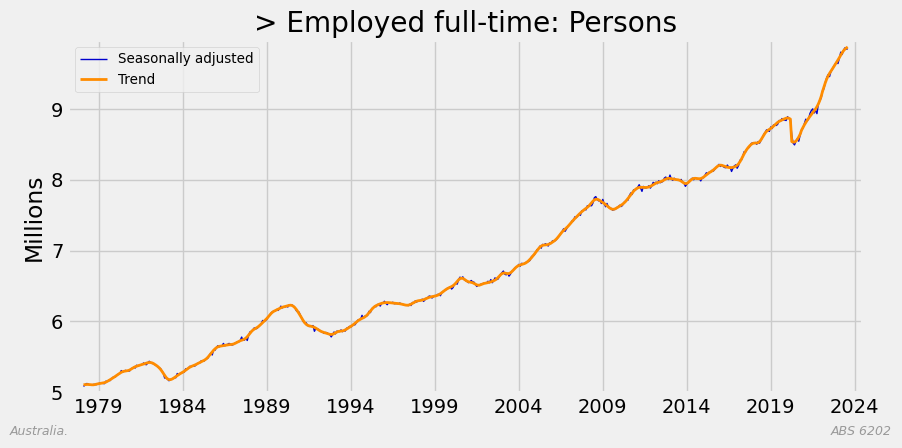

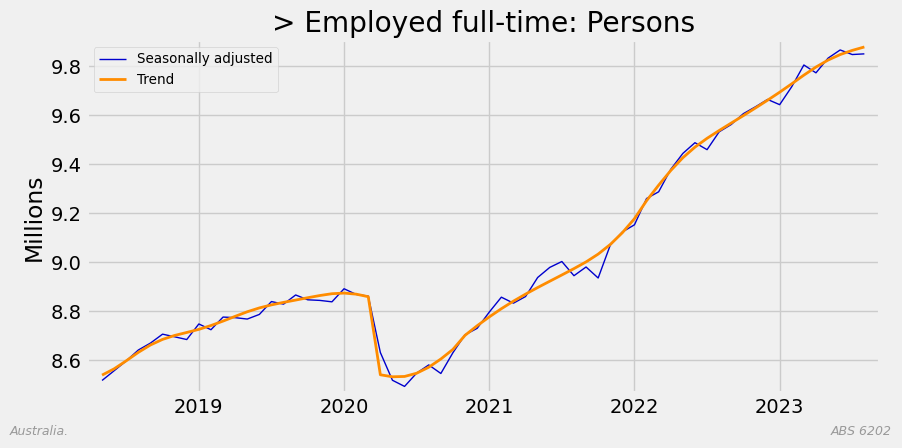

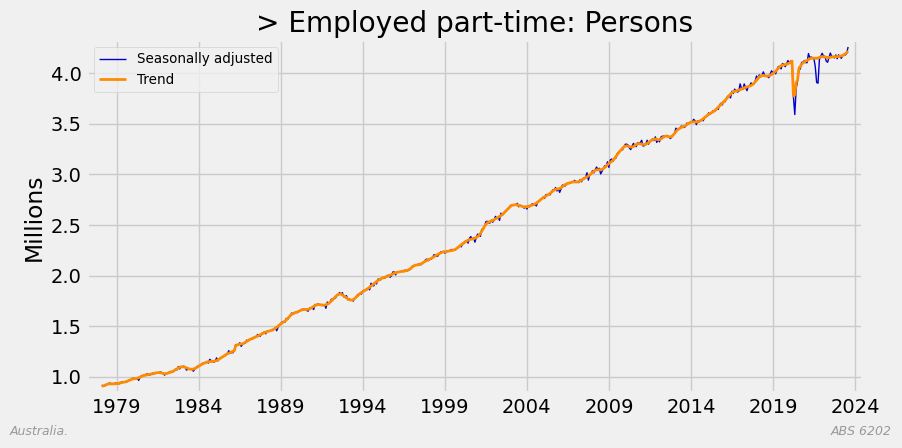

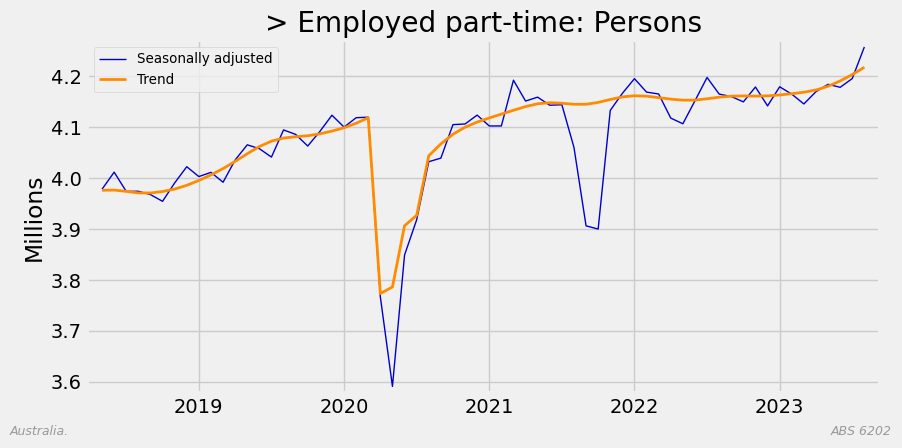

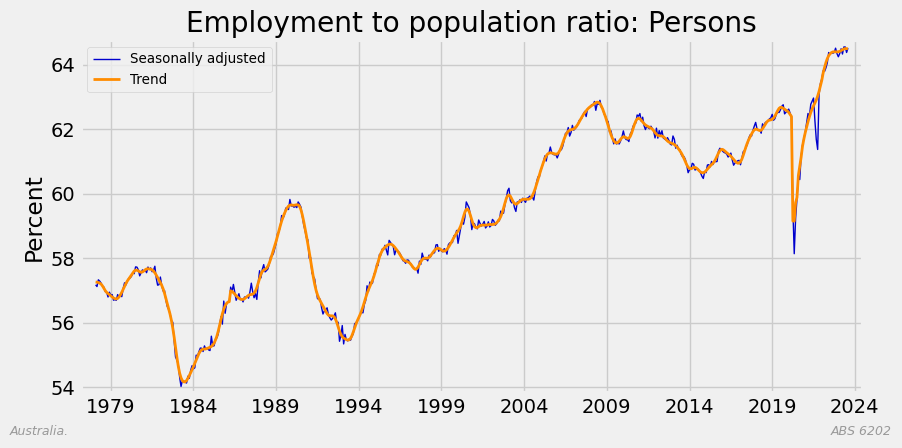

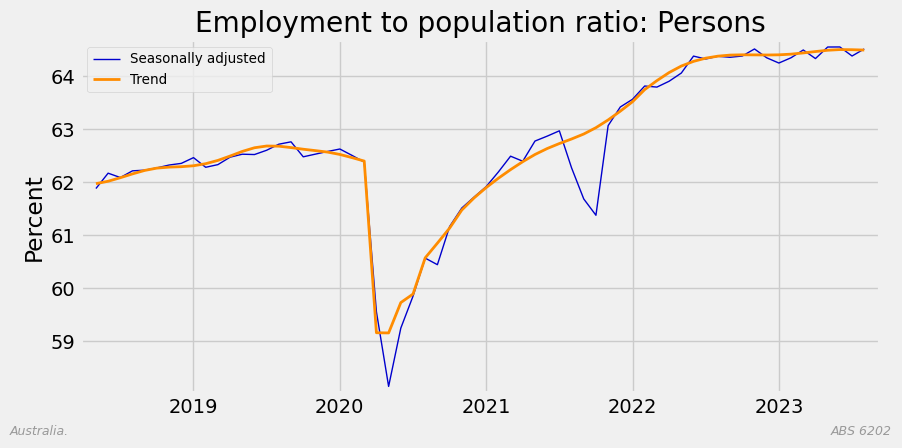

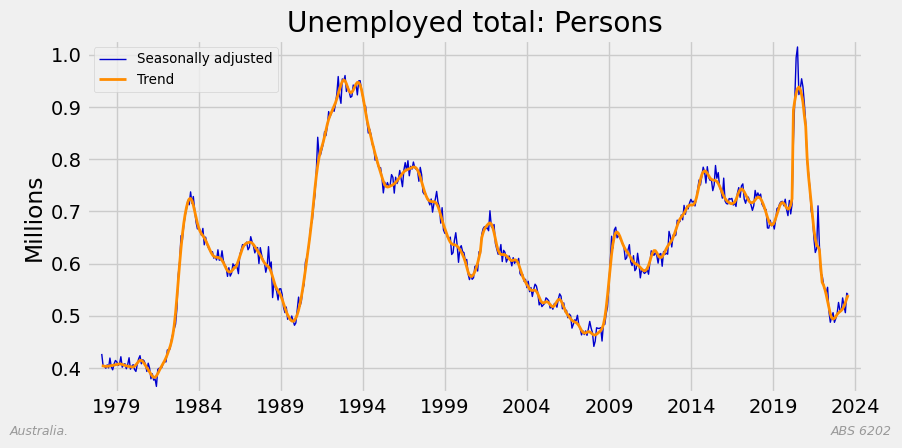

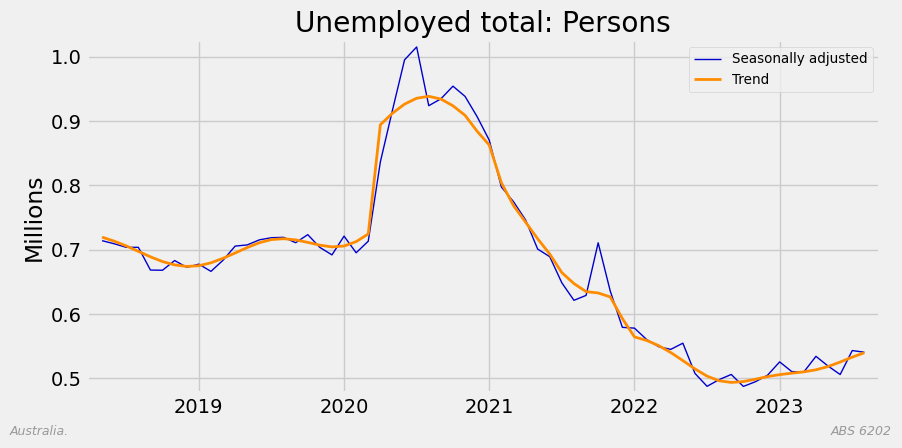

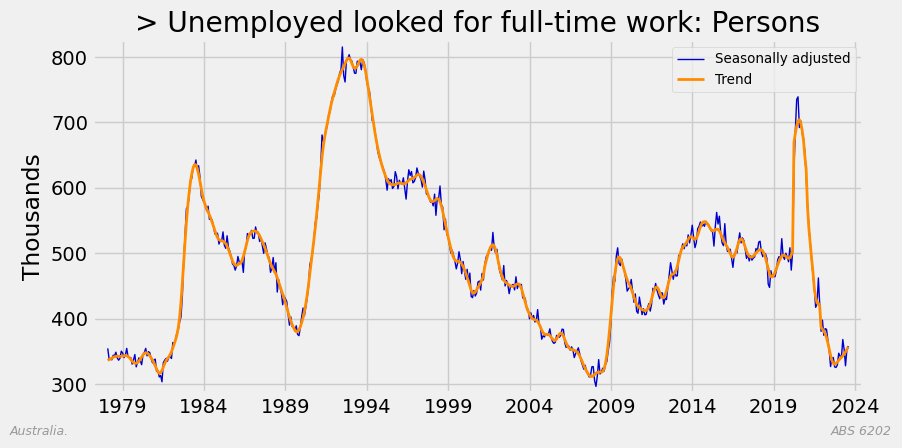

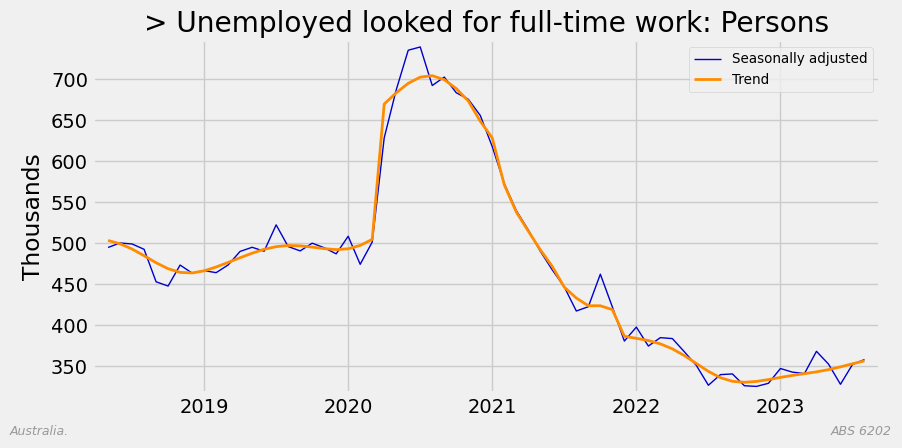

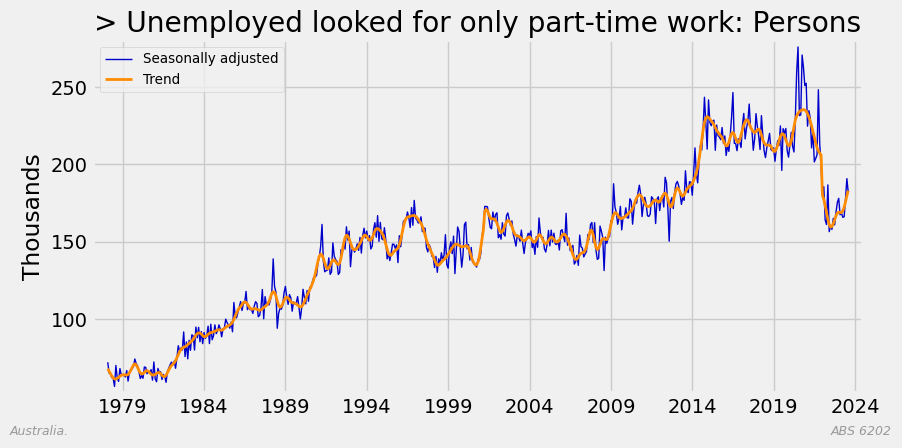

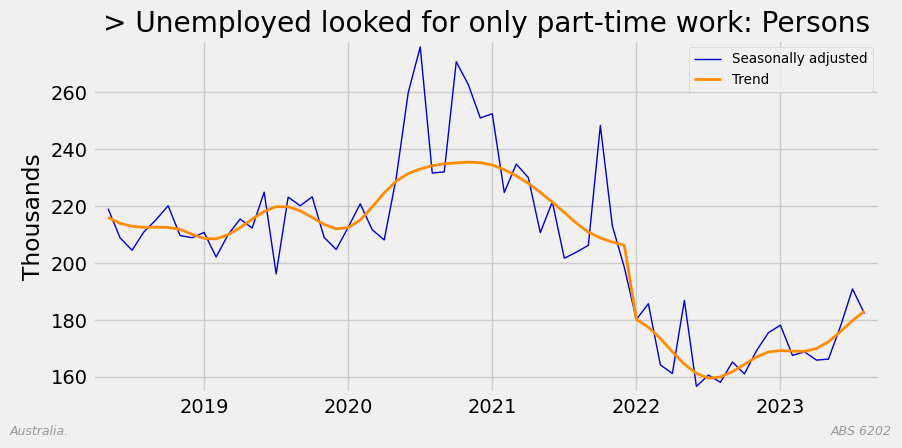

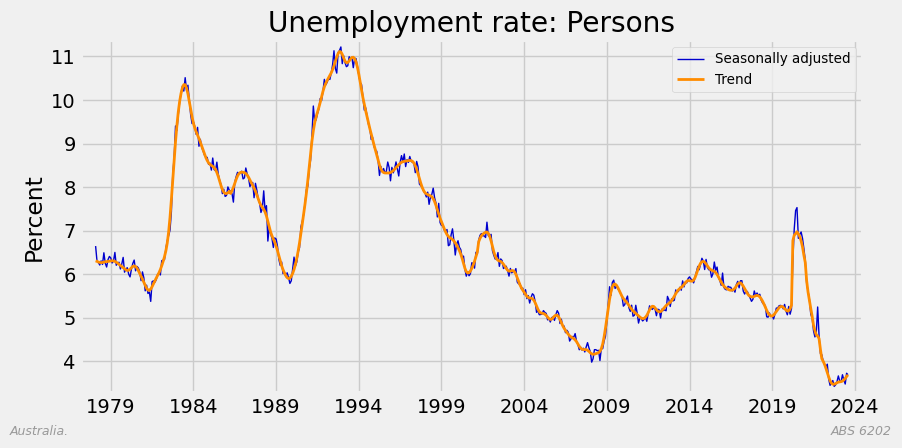

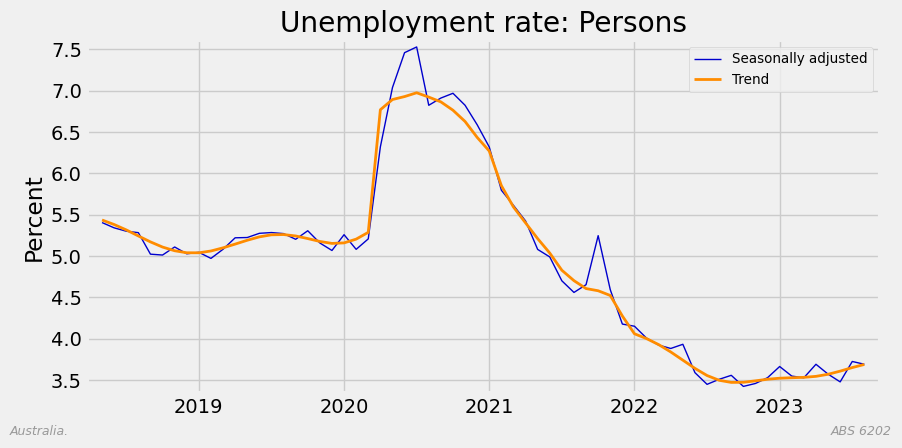

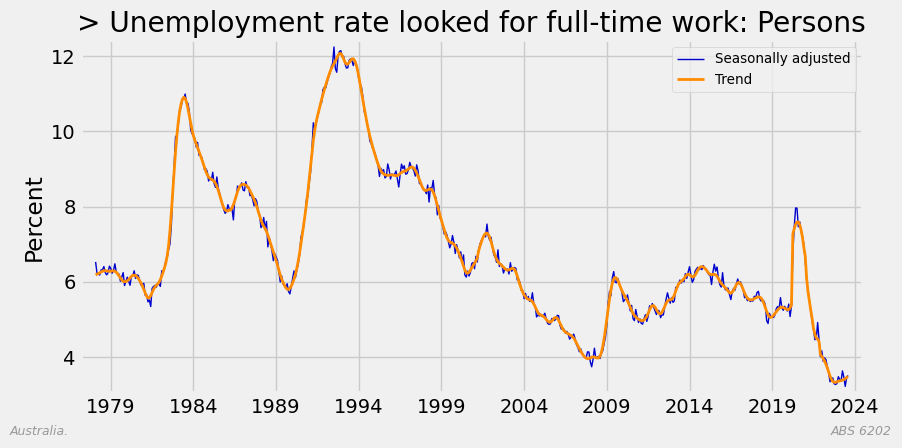

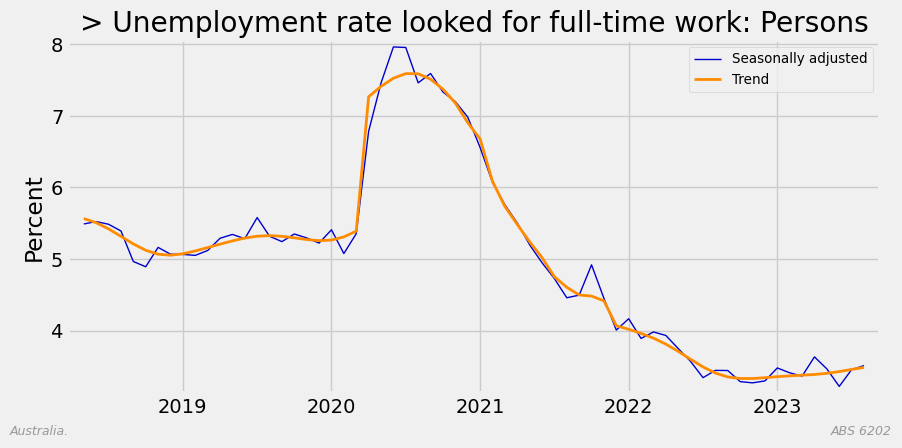

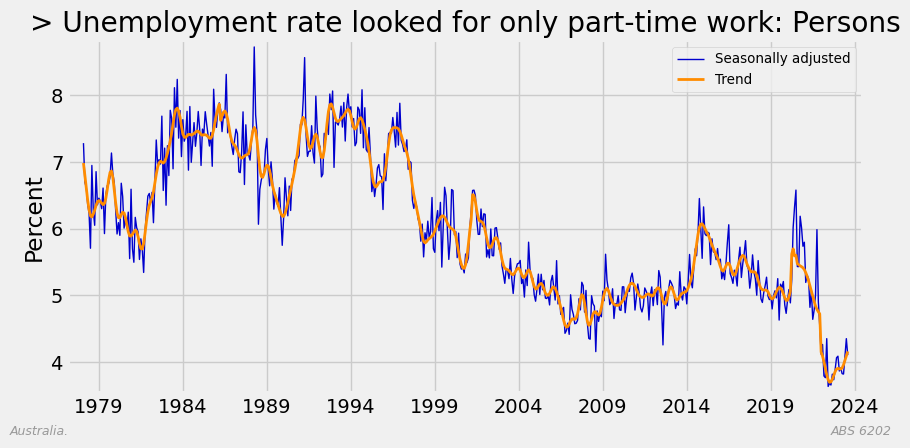

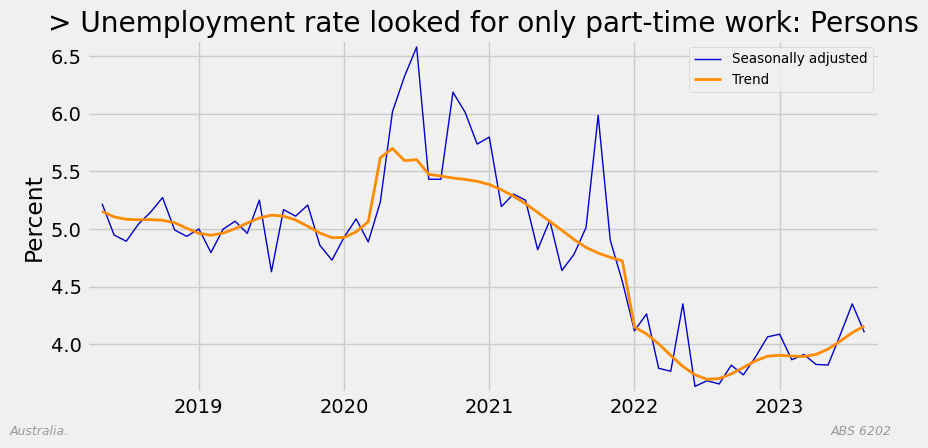

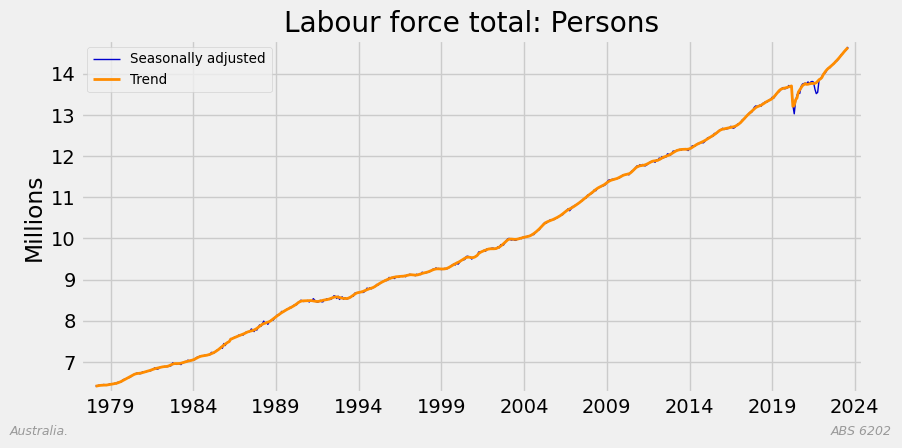

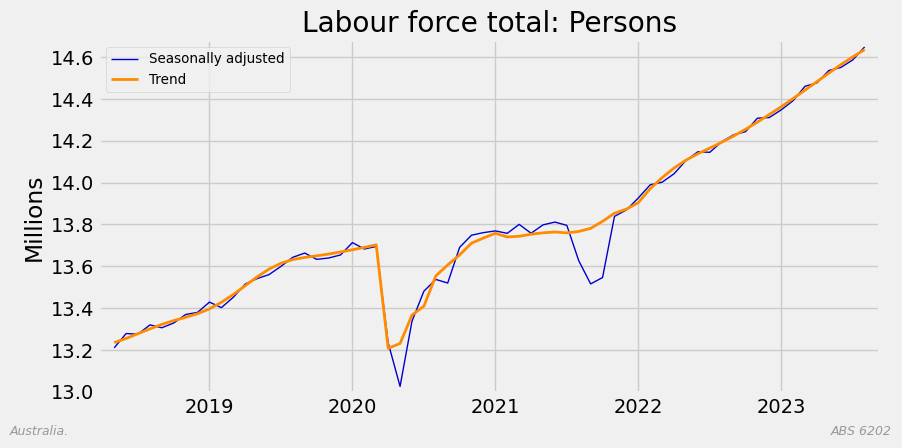

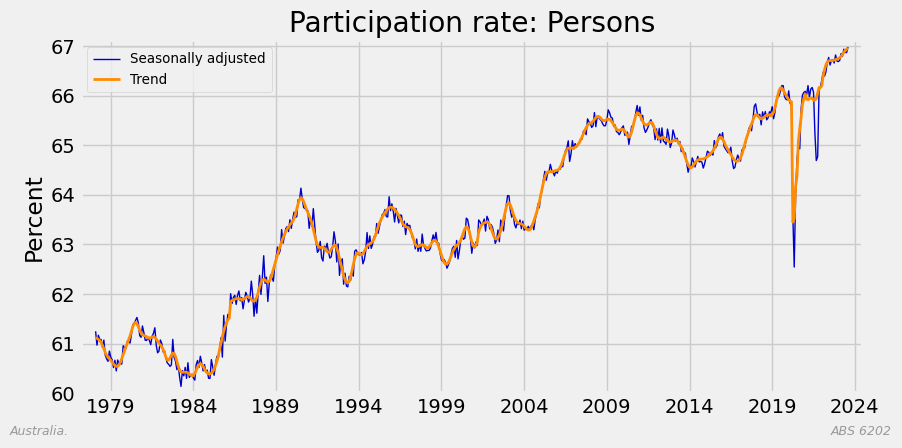

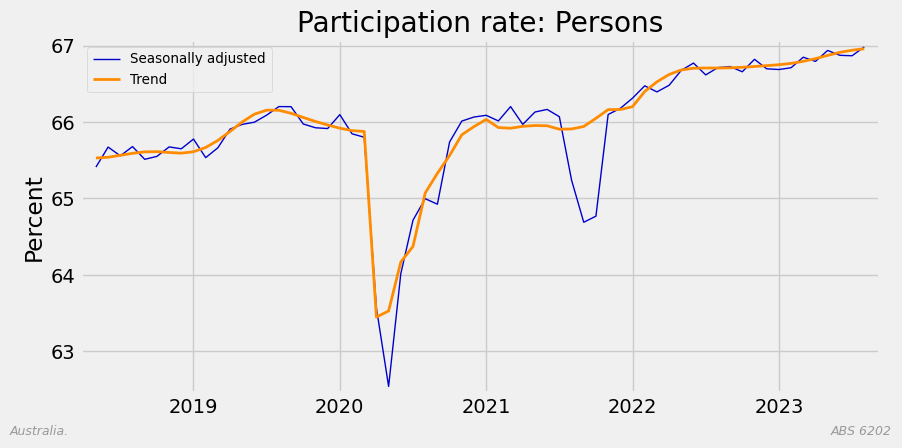

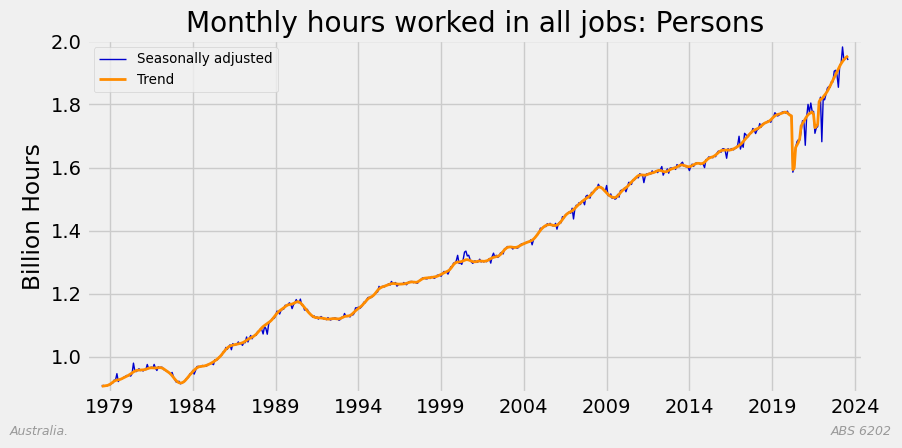

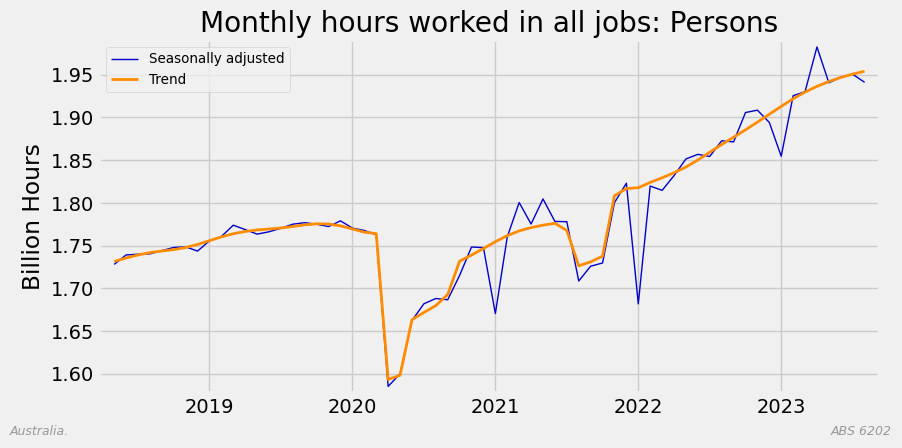

In [4]:
selector1 = {
    "Persons": did_col,
    "1": table_col,
}
selector2 = {
    "Monthly hours worked in all jobs ;  Persons ;": did_col,
    "19": table_col,
}

for selector in (selector1, selector2):
    plot_rows_seas_trend(
        meta,
        abs_dict,
        selector,
        starts=plot_times,
        tags=plot_tags,
        rfooter=source,
        lfooter="Australia. ",
        show=SHOW,
    )

### Headline COVID recovery charts

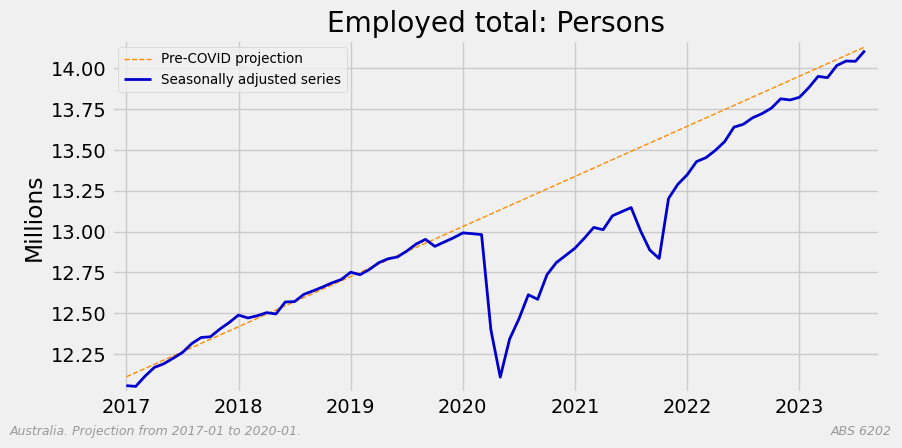

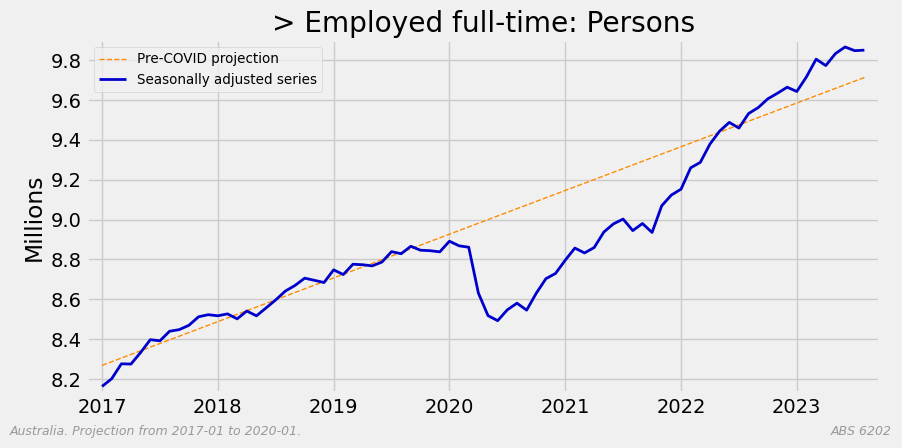

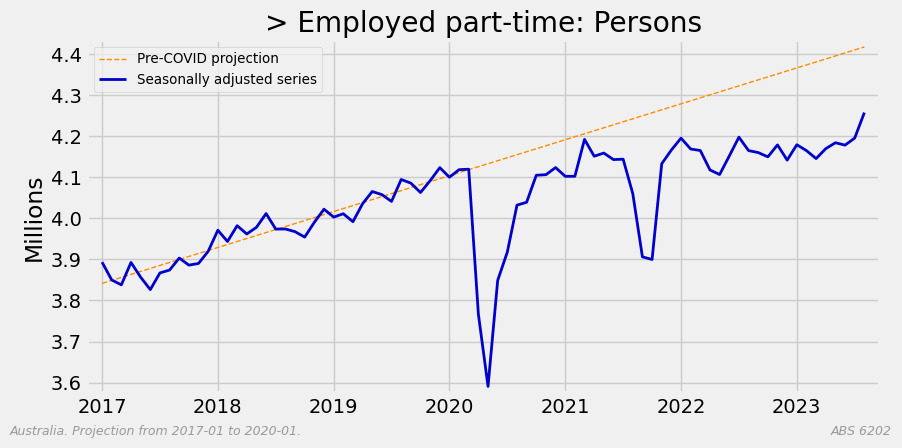

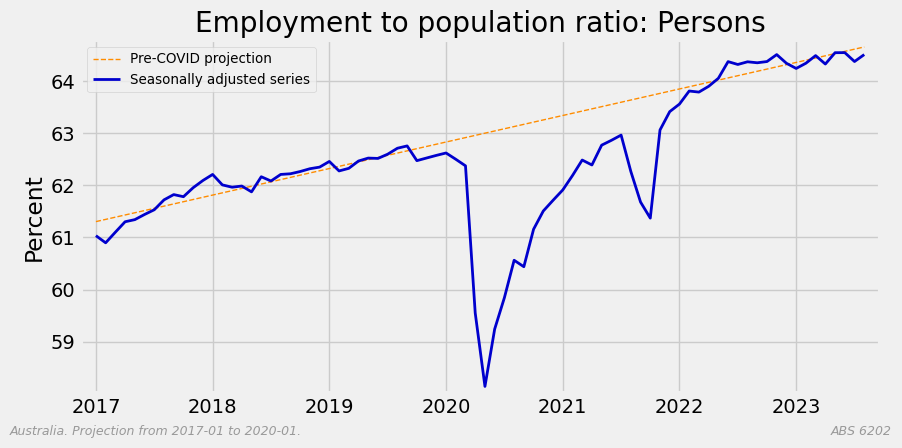

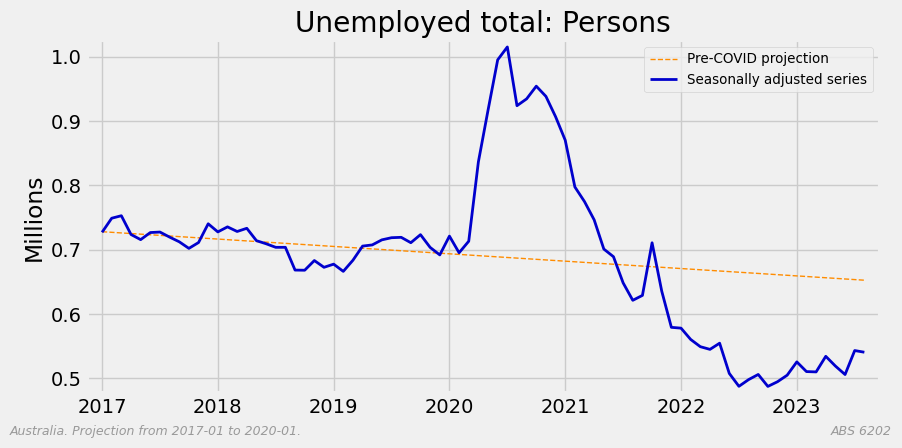

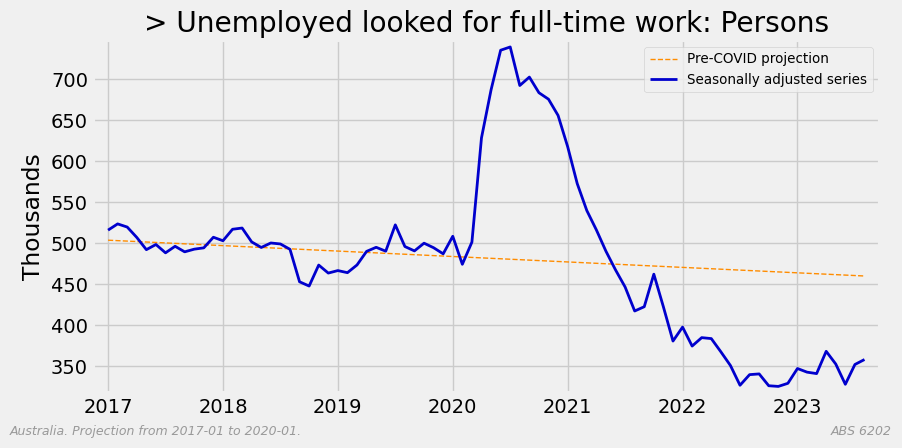

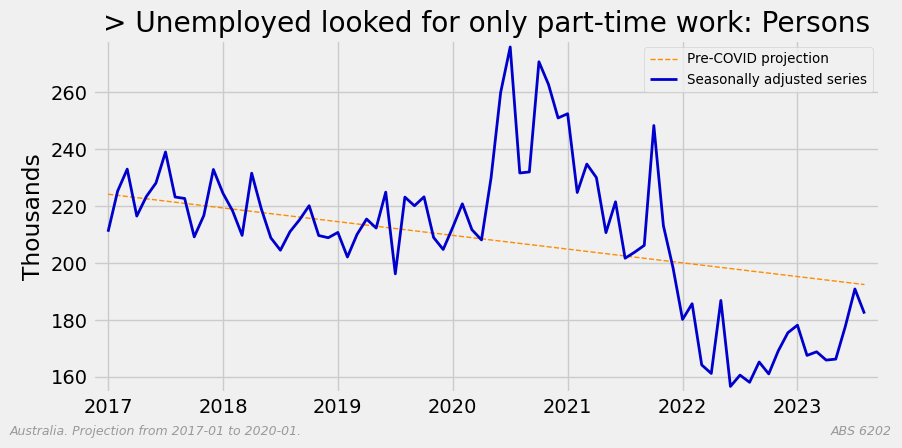

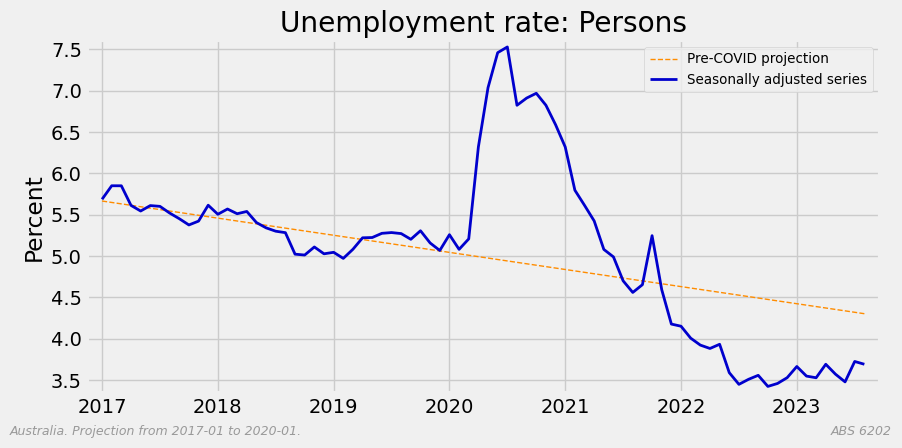

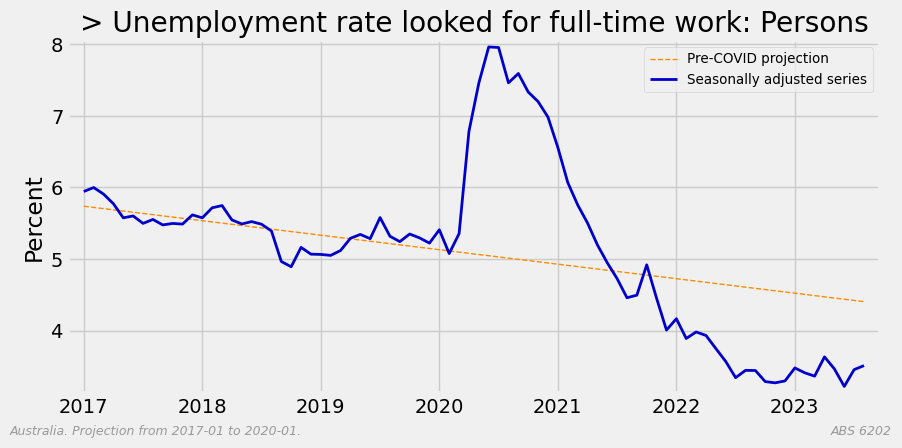

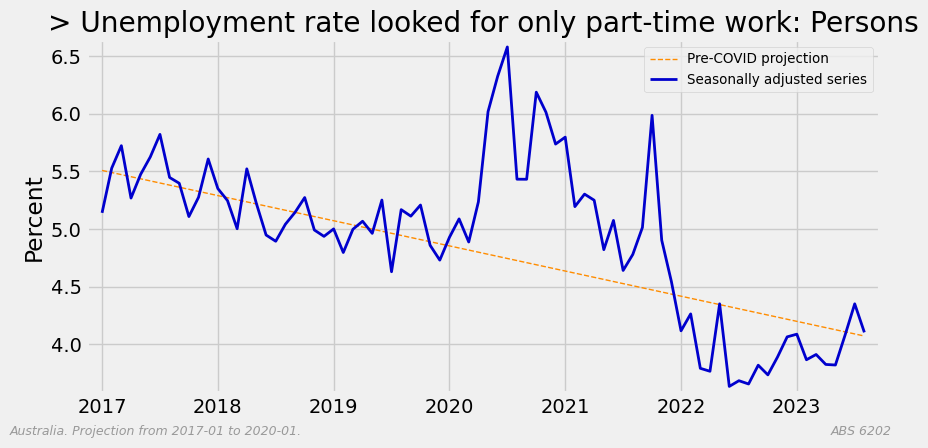

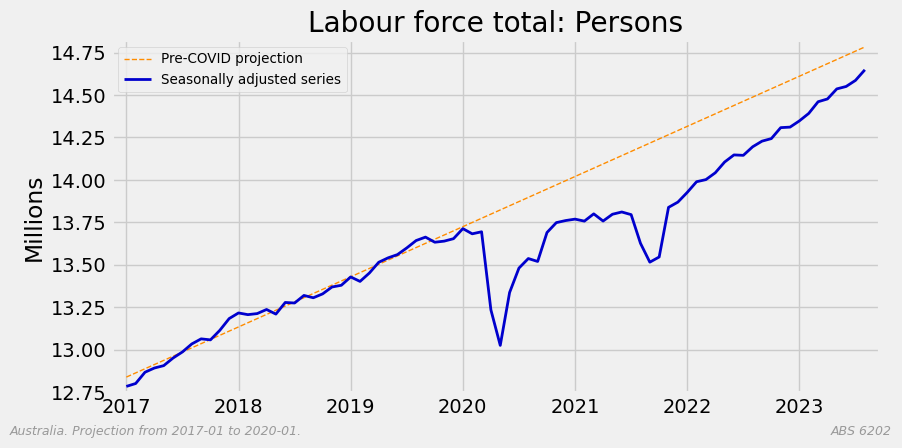

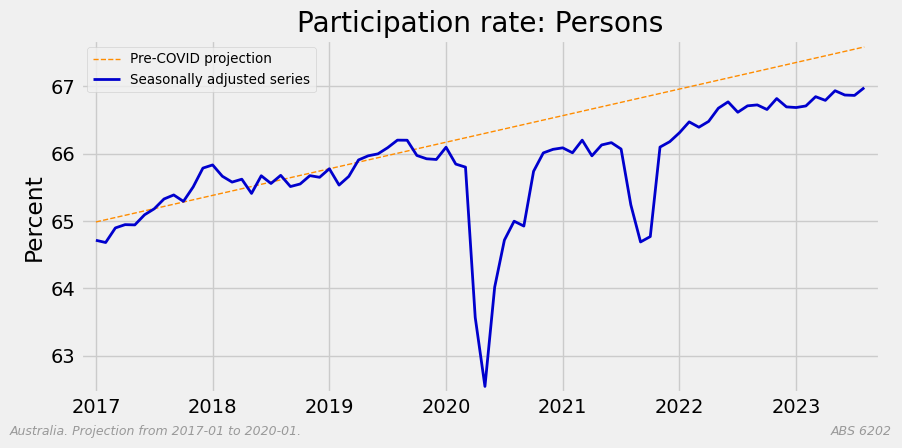

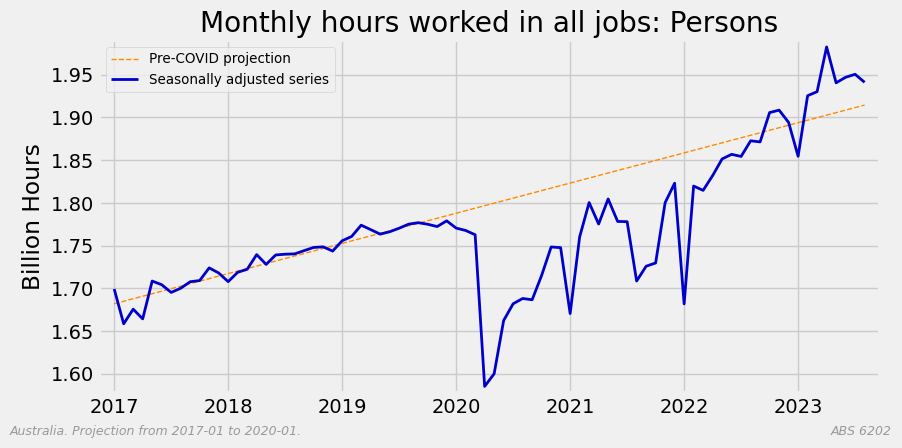

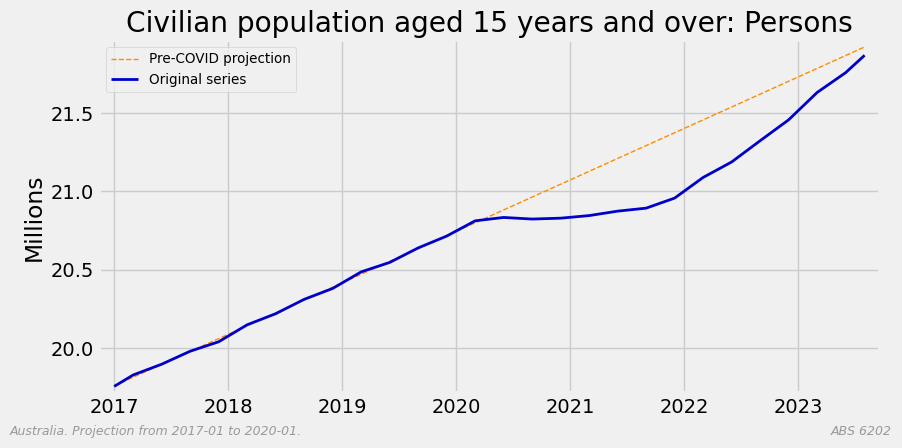

In [5]:
service_type = "Seasonally Adjusted"
selector1 = {
    "Persons": did_col,
    "1": table_col,
    service_type: type_col,
}
selector2 = {
    "Monthly hours worked in all jobs ;  Persons ;": did_col,
    "19": table_col,
    service_type: type_col,
}
selector3 = {
    "Original": type_col,
    "1": table_col,
    'Civilian population aged 15 years and over ;  Persons ;': did_col
}

for selector in (selector1, selector2, selector3):
    plot_rows_individually(
        meta,
        abs_dict,
        selector=selector,
        plot_function=plot_covid_recovery,
        tags="COVID",
        rfooter=source,
        lfooter="Australia. ",
        show=SHOW,
    )

### State comparisons 

In [6]:
# use linestyle to help differentiate datasets ...
linestyle = {
    "style": [
        "-.",
        "-",
        "--",
        ":",
    ]
    * 3  # repeat enough to cover all series
}

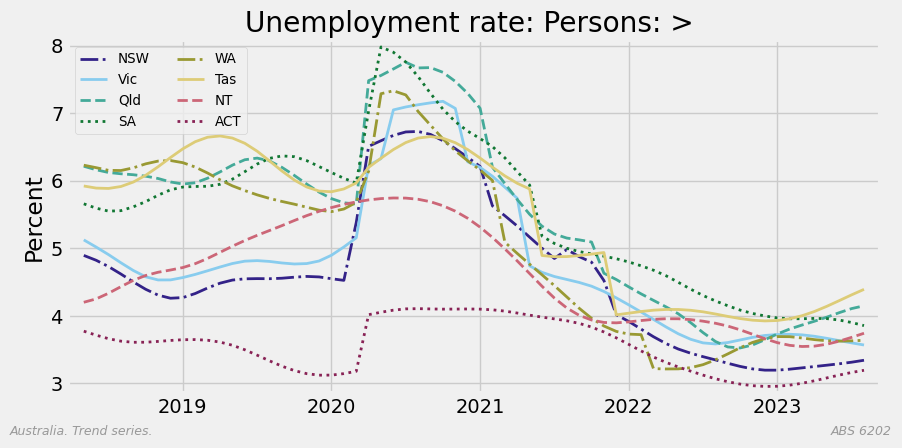

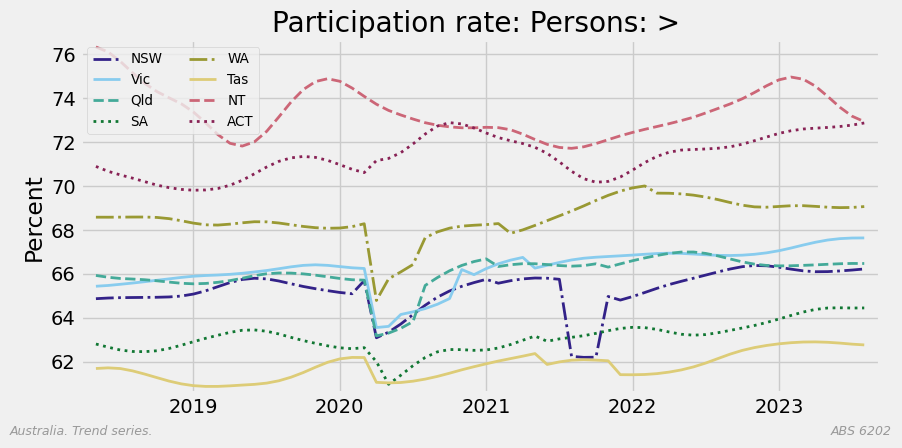

In [7]:
states = (
    "New South Wales|Victoria|Queensland|South Australia"
    "|Western Australia|Tasmania|Northern Territory|Australian Capital Territory"
)
#service_type = "Seasonally Adjusted"
service_type = "Trend"
selector = {
    states: did_col,
    service_type: type_col,
}
plot_stems = [
    "Unemployment rate ;  Persons",
    "Participation rate ;  Persons",
]

for stem in plot_stems:
    xselector = {**selector, stem: did_col}
    plot_rows_collectively(
        meta,
        abs_dict,
        selector=xselector,
        regex=True,
        starts=RECENT,
        **linestyle,
        legend={"loc": "upper left"},
        rfooter=source,
        lfooter=f"Australia. {service_type.capitalize()} series.",
        show=SHOW,
    )

### Headline Growth

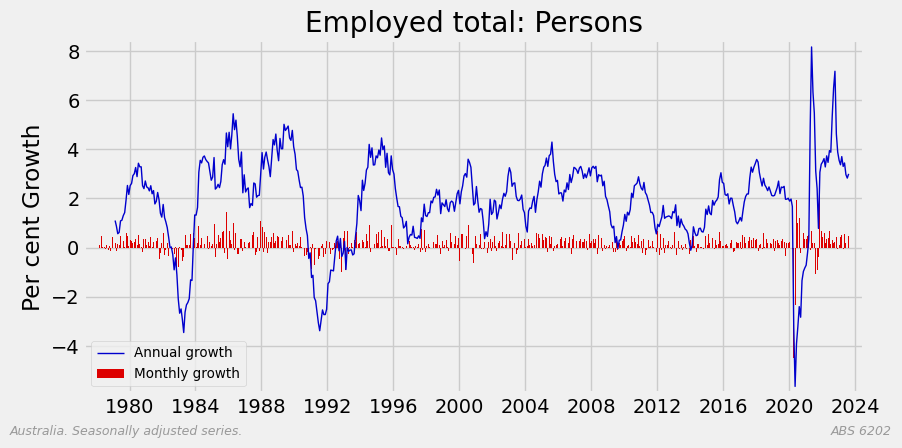

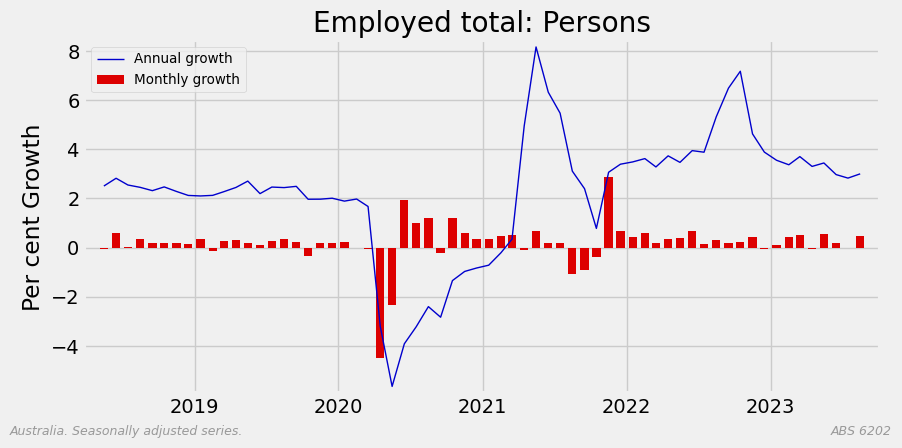

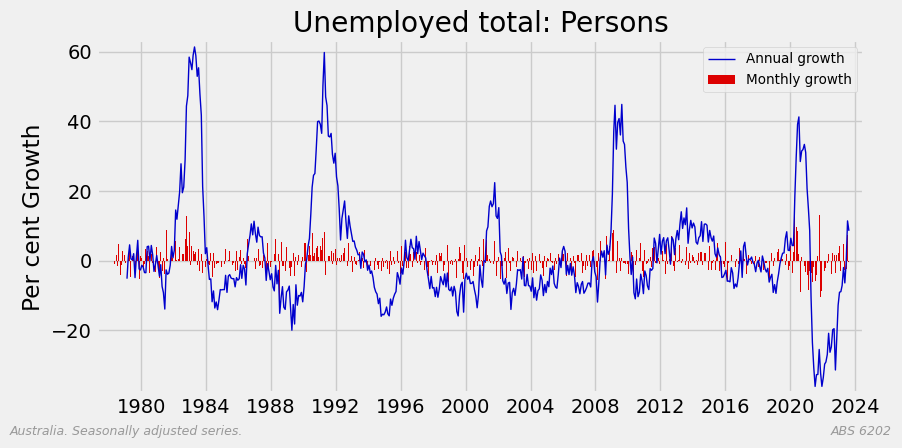

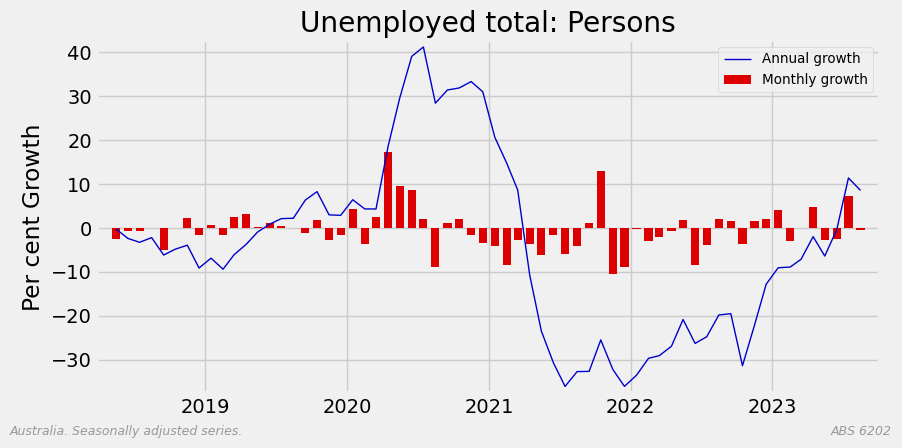

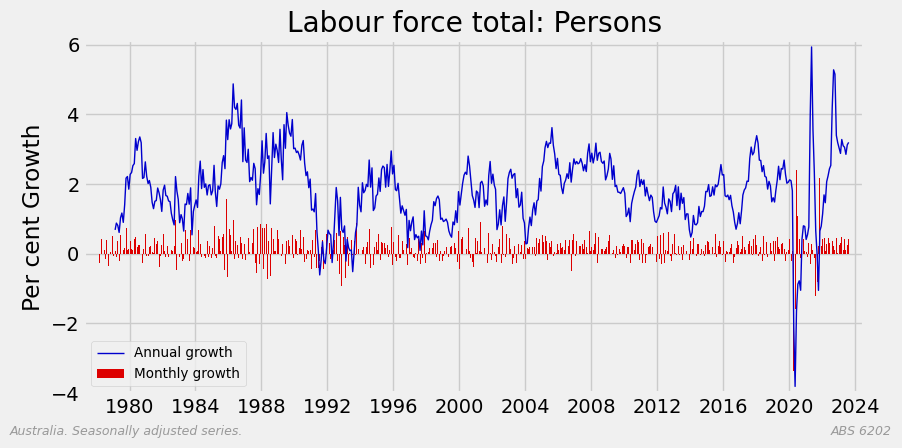

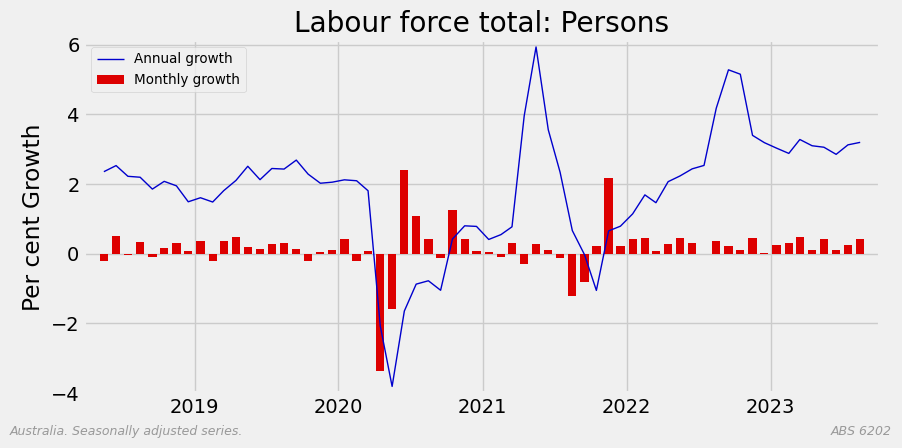

In [8]:
plot_stems = "|".join(
    [
        "Employed total ;  Persons ;",
        "Unemployed total ;  Persons ;",
        "Labour force total ;  Persons ;",
    ]
)

service_type = "Seasonally Adjusted"
plot_rows_individually(
    meta,
    abs_dict,
    # data selection
    selector={"1": table_col, plot_stems: did_col, service_type: type_col},
    regex=True,
    # plotting
    plot_function=calc_and_plot_growth,
    from_=plot_times,
    tag="growth",
    rfooter=source,
    lfooter=f"Australia. {service_type.capitalize()} series. ",
    show=SHOW,
)

### Gendered comparisons

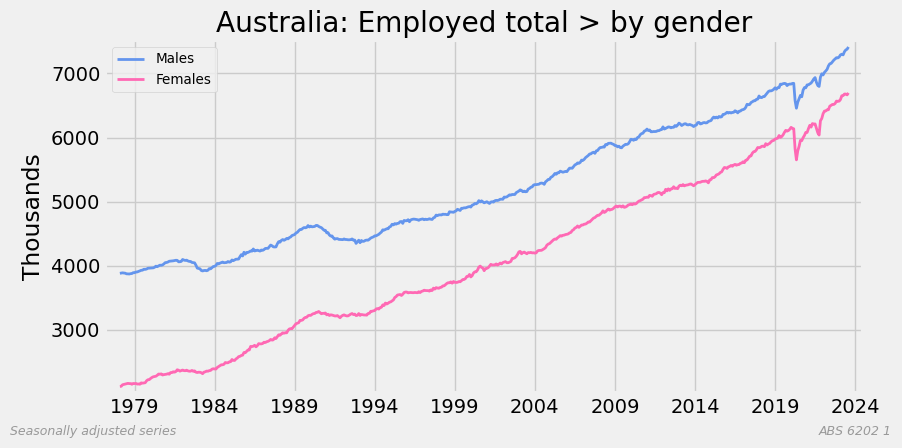

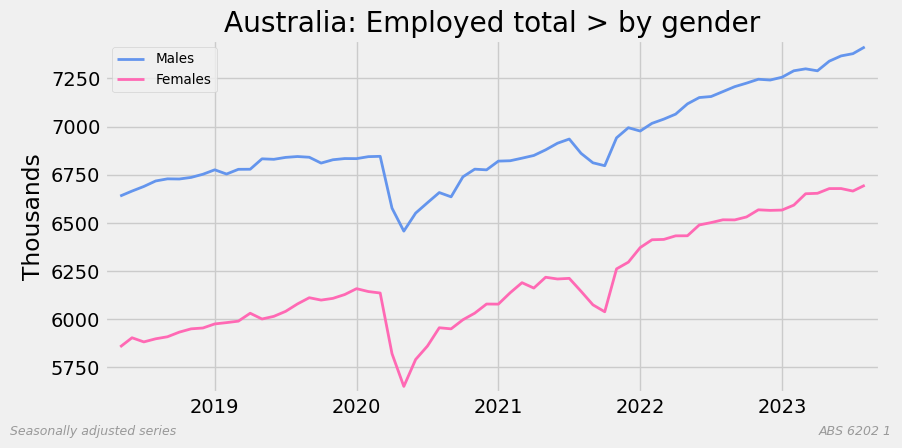

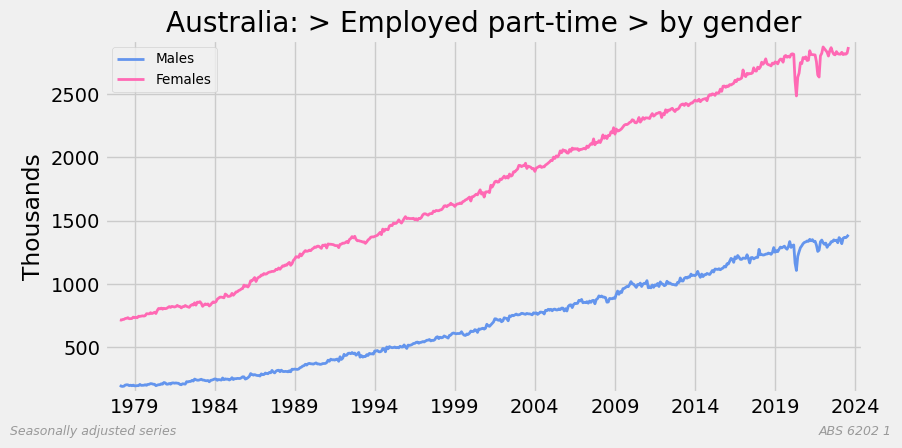

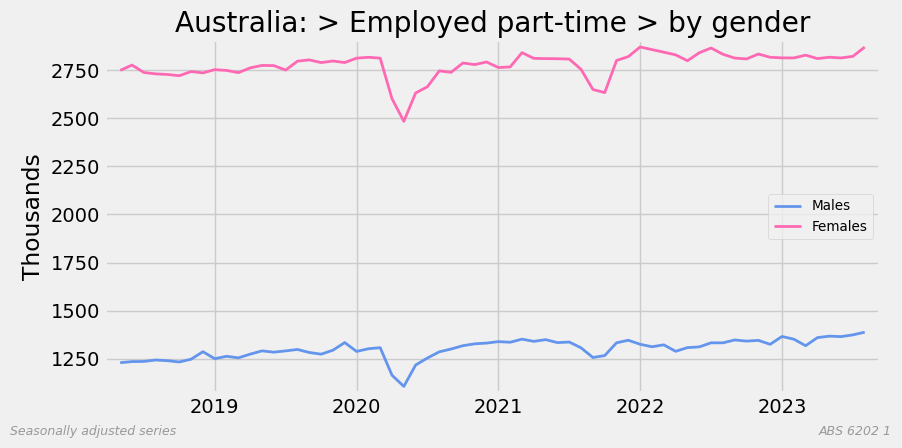

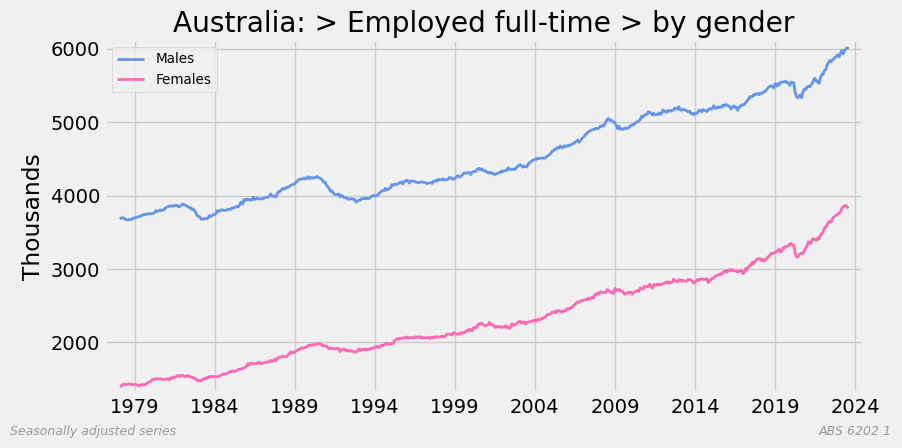

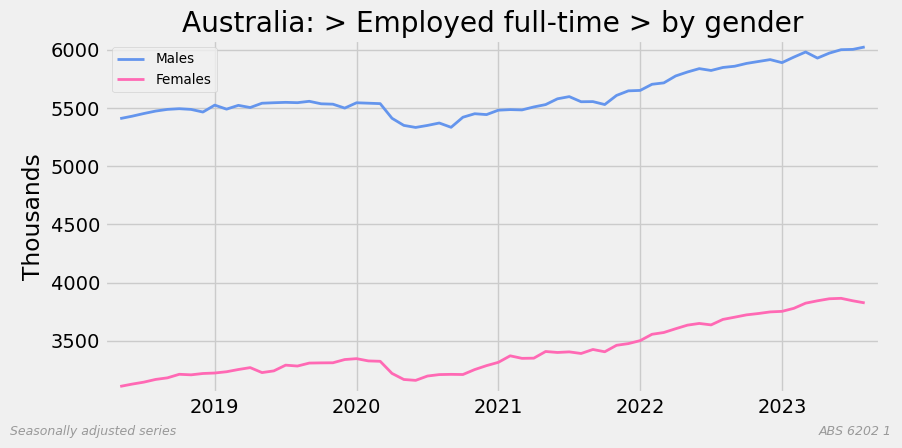

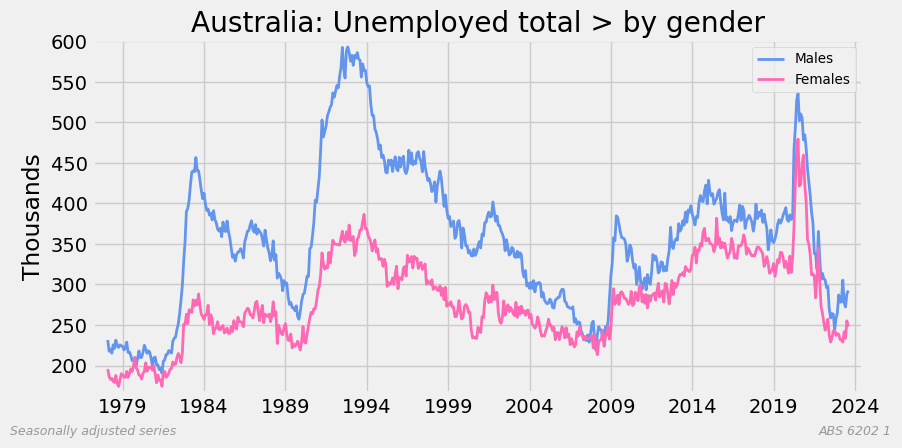

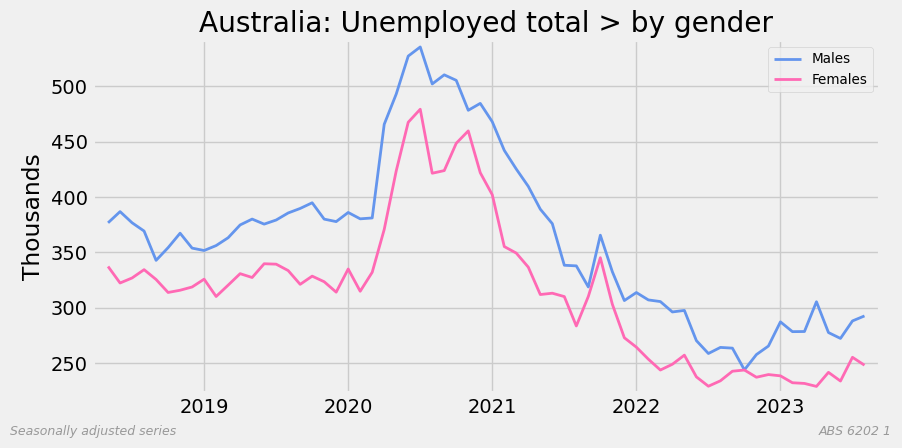

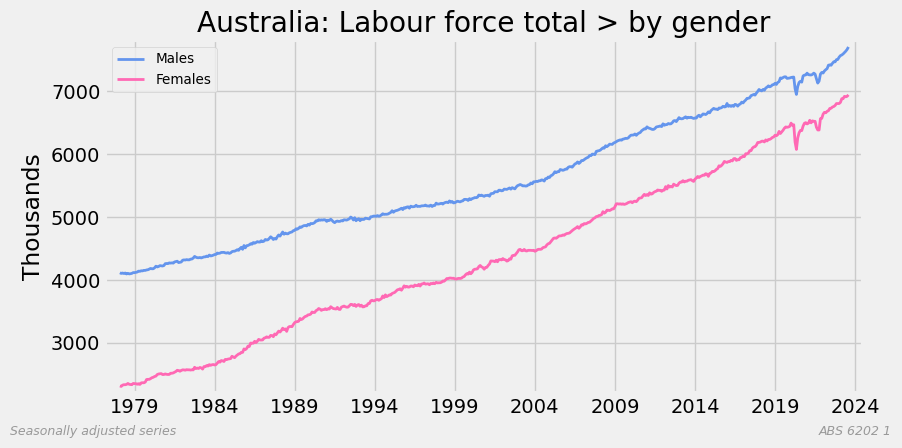

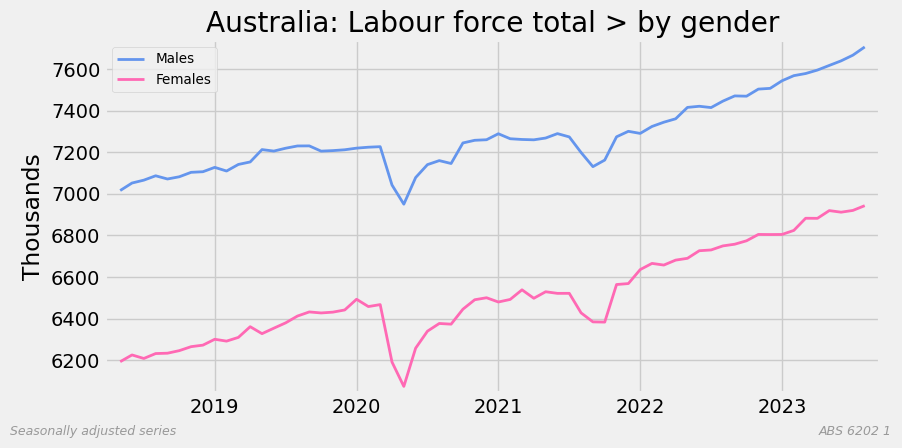

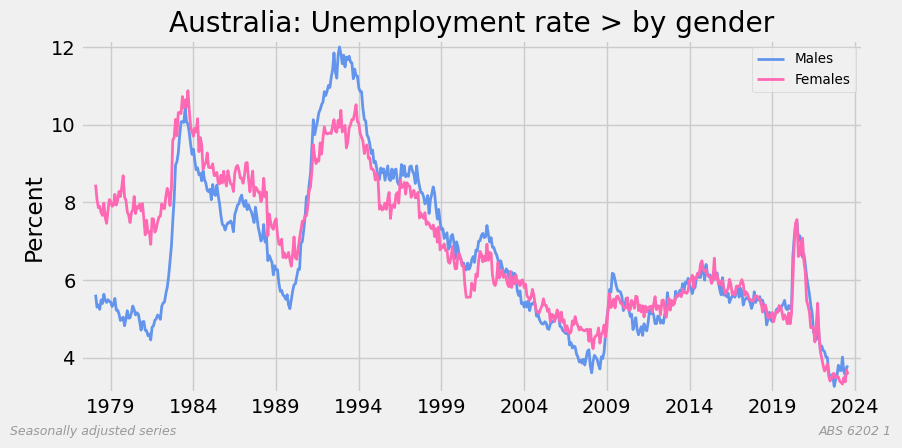

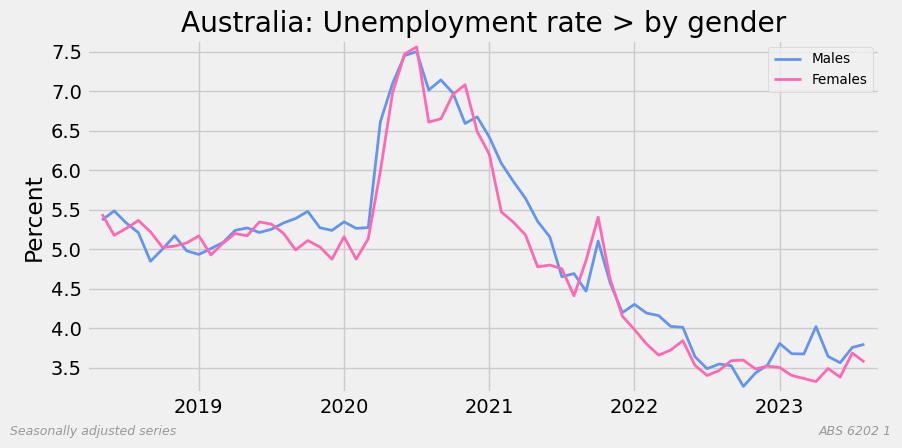

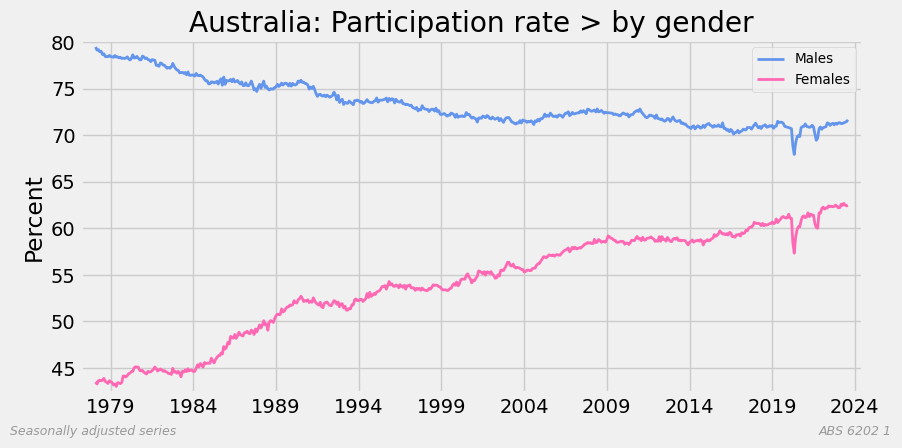

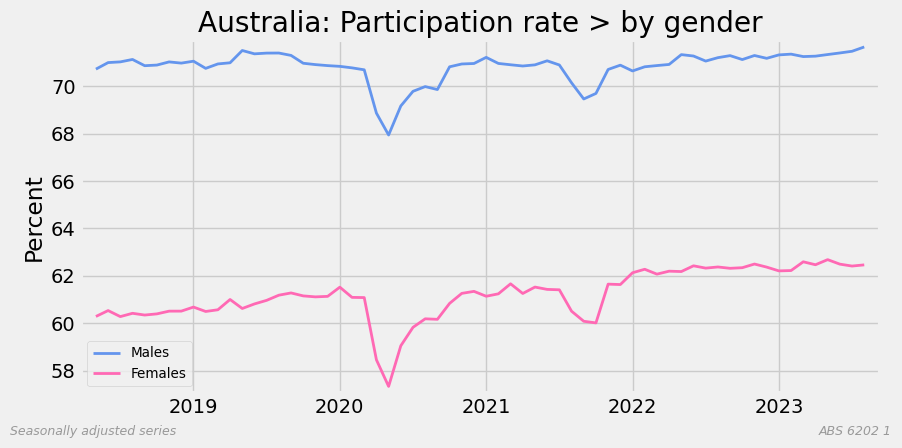

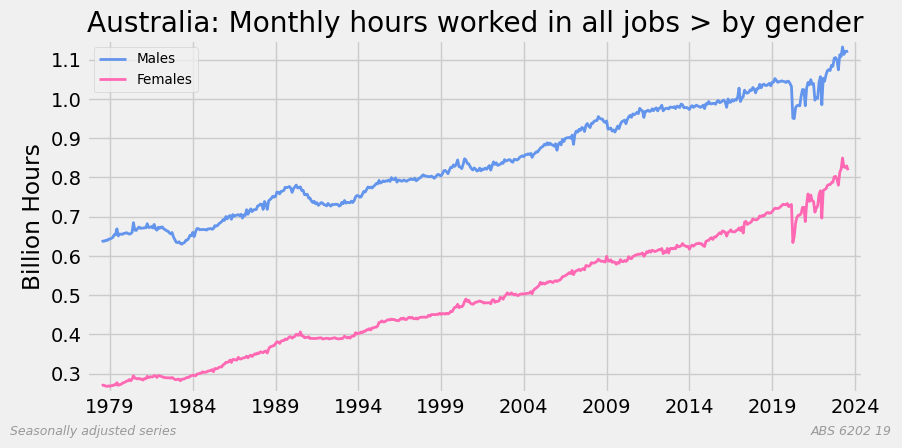

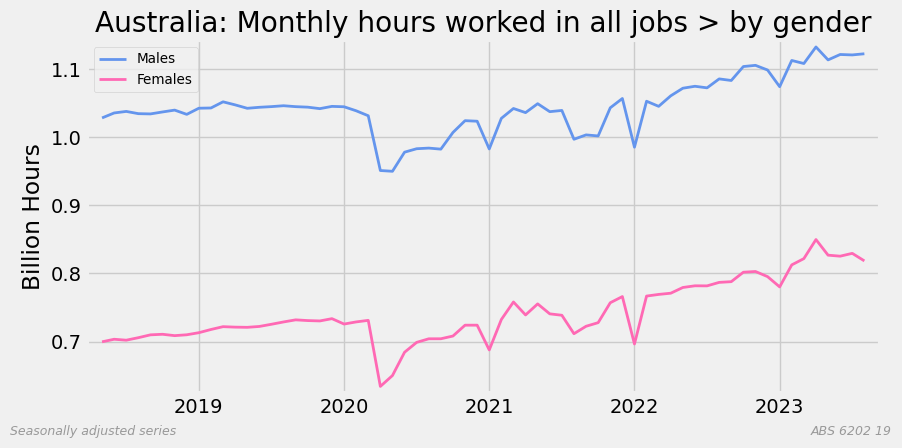

In [9]:
genders = ["Males", "Females"]
colours = ["cornflowerblue", "hotpink"]

TOKEN = "by gender"  # note: also appears in plot title
plots = {
    # data description                       # table
    f"Employed total ;  > {TOKEN} ;": "1",
    f"> Employed part-time ;  > {TOKEN} ;": "1",
    f"> Employed full-time ;  > {TOKEN} ;": "1",
    f"Unemployed total ;  > {TOKEN} ;": "1",
    f"Labour force total ;  > {TOKEN} ;": "1",
    f"Unemployment rate ;  > {TOKEN} ;": "1",
    f"Participation rate ;  > {TOKEN} ;": "1",
    f"Monthly hours worked in all jobs ;  > {TOKEN} ;": "19",
}

series_type = "Seasonally Adjusted"

for plot, table in plots.items():
    # assemble data
    collection = {}
    for gender in genders:
        this_gender = plot.replace(TOKEN, gender)
        ident, units = get_identifier(meta, this_gender, series_type, table)
        collection[gender] = abs_dict[table][ident]
    df = pd.DataFrame(collection)

    # Hours is a special case
    if units in ["000 Hours", "Thousand Hours"]:
        units = "Billion Hours"
        df = df / 1_000_000

    title = f"Australia: {plot}".replace(" ;", "").replace("  ", " ")
    line_plot(
        df,
        starts=plot_times,
        tags=plot_tags,
        color=colours,
        title=title,
        ylabel=units,
        rfooter=f"{source} {table}",
        lfooter=f"{series_type.capitalize()} series",
        show=SHOW,
    )

## Finished

In [10]:
# watermark
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Mon Sep 18 2023 10:02:05

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

matplotlib: 3.7.2
sys       : 3.11.5 | packaged by conda-forge | (main, Aug 27 2023, 03:35:23) [Clang 15.0.7 ]
pandas    : 2.1.0

Watermark: 2.4.3



In [11]:
print("Finished")

Finished
